In [3]:
#Loading the required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
plt.style.use('ggplot')
%matplotlib inline

In [4]:
#Loading the dataframe
df = pd.read_csv(r"E:\new-house-price-prediction\new\data\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
numerical_features = ['total_sqft', 'price']
categorical_features = ['area_type', 'bath', 'balcony']

In [9]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
df = df.dropna(subset=['location', 'size', 'bath'])
df.shape

(13246, 9)

In [12]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [13]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [14]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8740
Built-up  Area          2410
Plot  Area              2009
Carpet  Area              87
Name: count, dtype: int64

<Axes: ylabel='area_type'>

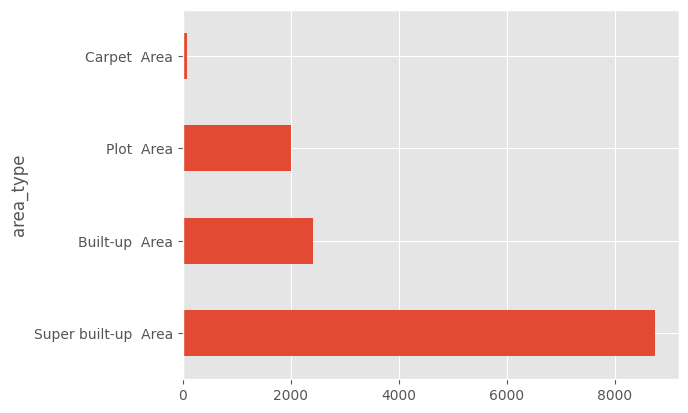

In [15]:
df['area_type'].value_counts().plot(kind='barh')

<Axes: ylabel='count'>

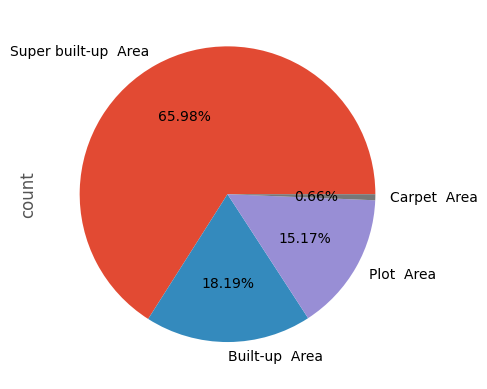

In [16]:
df['area_type'].value_counts().plot(kind='pie', autopct='%.2f%%')

- The prices of most properties are based on the super built-up area

In [17]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [18]:
df['availability'].value_counts().sort_index(ascending=False)

availability
Ready To Move    10564
22-Nov               2
22-May               8
22-Mar               3
22-Jun              19
                 ...  
15-Jun               1
15-Dec               1
15-Aug               1
14-Nov               1
14-Jul               1
Name: count, Length: 80, dtype: int64

In [19]:
df['availability'] = df['availability'].apply(lambda x: 'Other' if x!='Ready To Move' else x)

<Axes: ylabel='availability'>

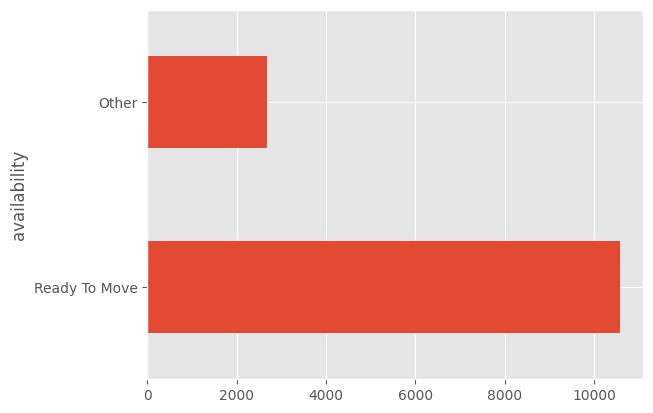

In [20]:
df['availability'].value_counts().plot(kind='barh')

In [21]:
df['availability'].value_counts()

availability
Ready To Move    10564
Other             2682
Name: count, dtype: int64

- Most of the properties offered are ready to move in

In [22]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Other,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [23]:
df['location'].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

<Axes: >

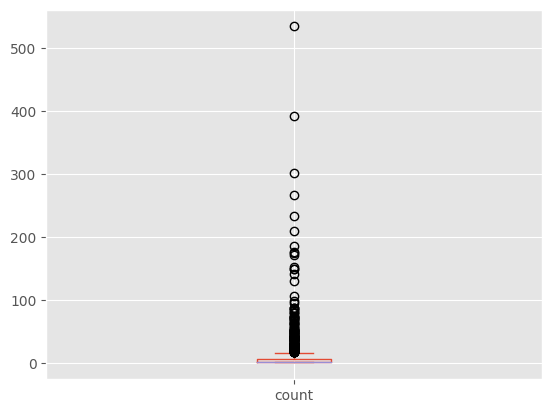

In [24]:
df['location'].value_counts().plot(kind='box')

In [25]:
location_counts = df['location'].value_counts()
filtered_locs = location_counts[location_counts<=10]
df['location'] = df['location'].apply(lambda x: 'Other' if x in filtered_locs else x)

In [26]:
df['location'].value_counts()

location
Other                 2896
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [27]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [28]:
#Creating a new column 'bhk'
df['bhk'] = df['size'].str.split(' ').str.get(0)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Other,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [29]:
df.isna().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath               0
balcony          536
price              0
bhk                0
dtype: int64

In [30]:
df.drop('size', axis='columns', inplace=True)

In [31]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Other,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2


In [32]:
df['bhk'].value_counts()

bhk
2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

In [33]:
df['bhk'].dtype

dtype('O')

In [34]:
df['bhk'] = pd.to_numeric(df['bhk'])

In [35]:
df.isna().sum()

area_type          0
availability       0
location           0
society         5499
total_sqft         0
bath               0
balcony          536
price              0
bhk                0
dtype: int64

In [36]:
df.drop('society', axis=1, inplace=True)

In [37]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Other,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [38]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [39]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df['total_sqft'].apply(is_float)].head(20)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Other,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Other,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,Other,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Other,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Other,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Ready To Move,Arekere,4125Perch,9.0,NaN,265.000,9
661,Super built-up Area,Ready To Move,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Other,Other,3090 - 5002,4.0,0.0,445.000,4


In [40]:
def extract_sqft(x):
    tokens = x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [41]:
df['total_sqft'] = df['total_sqft'].apply(extract_sqft)

In [42]:
df[~df['total_sqft'].apply(is_float)].head(20)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk


In [43]:
df['total_sqft'].isnull().sum()

46

In [44]:
df.shape

(13246, 8)

In [45]:
df.dropna(subset=['total_sqft'], inplace=True)

In [46]:
df.shape

(13200, 8)

In [47]:
df['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

- The typical square footage per bedroom is around 300. Therefore, properties that deviate significantly from this standard and appear suspicious will be removed

In [48]:
df[df.total_sqft/df.bhk<300].head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
9,Plot Area,Ready To Move,Other,1020.0,6.0,NaN,370.0,6
45,Plot Area,Ready To Move,HSR Layout,600.0,9.0,NaN,200.0,8
58,Plot Area,Ready To Move,Murugeshpalya,1407.0,4.0,1.0,150.0,6
68,Plot Area,Ready To Move,Other,1350.0,7.0,0.0,85.0,8
70,Plot Area,Ready To Move,Other,500.0,3.0,2.0,100.0,3


In [49]:
len(df[df.total_sqft/df.bhk<300])

744

In [50]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(12456, 8)

<Axes: ylabel='Frequency'>

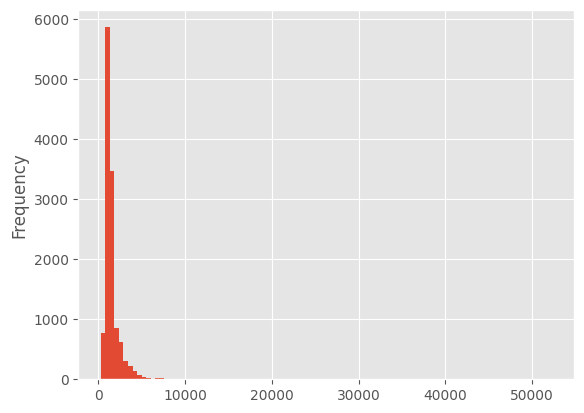

In [51]:
df['total_sqft'].plot(kind='hist', bins=100)

<Axes: >

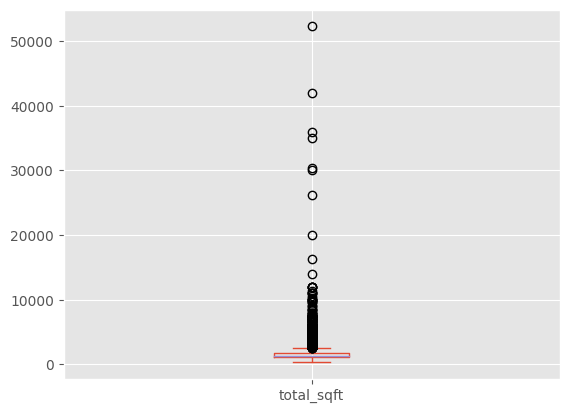

In [52]:
df['total_sqft'].plot(kind='box')

In [53]:
len(df[df['total_sqft']>3500])

523

<Axes: ylabel='Density'>

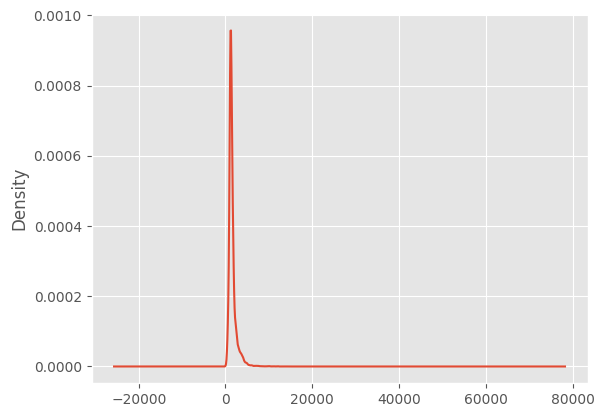

In [54]:
df['total_sqft'].plot(kind='kde')

In [55]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Other,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [56]:
df['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [57]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>(m-std)) & (subdf['price_per_sqft']<=(m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [58]:
df = remove_pps_outliers(df)
df.shape

(10244, 9)

In [59]:
df.isna().sum()

area_type           0
availability        0
location            0
total_sqft          0
bath                0
balcony           312
price               0
bhk                 0
price_per_sqft      0
dtype: int64

In [60]:
df['bath'].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [61]:
df['bath'].value_counts()

bath
2.0     5930
3.0     2620
4.0      677
1.0      616
5.0      235
6.0      107
7.0       27
8.0       17
9.0       10
12.0       3
16.0       1
13.0       1
Name: count, dtype: int64

- Most properties feature 2 bathrooms, with 3 bathrooms being the next most common option

In [62]:
df.columns

Index(['area_type', 'availability', 'location', 'total_sqft', 'bath',
       'balcony', 'price', 'bhk', 'price_per_sqft'],
      dtype='object')

In [63]:
df['balcony'].value_counts()

balcony
2.0    4095
1.0    3879
3.0    1250
0.0     708
Name: count, dtype: int64

In [64]:
df.isna().sum()

area_type           0
availability        0
location            0
total_sqft          0
bath                0
balcony           312
price               0
bhk                 0
price_per_sqft      0
dtype: int64

In [65]:
df['balcony'].unique()

array([ 3.,  2.,  1.,  0., nan])

In [66]:
imputer = SimpleImputer(strategy='most_frequent')
balcony_data = df['balcony'].values.reshape(-1, 1)
imputed_balcony = imputer.fit_transform(balcony_data)
df['balcony'] = imputed_balcony

In [67]:
df['balcony'].value_counts()

balcony
2.0    4407
1.0    3879
3.0    1250
0.0     708
Name: count, dtype: int64

<Axes: xlabel='balcony'>

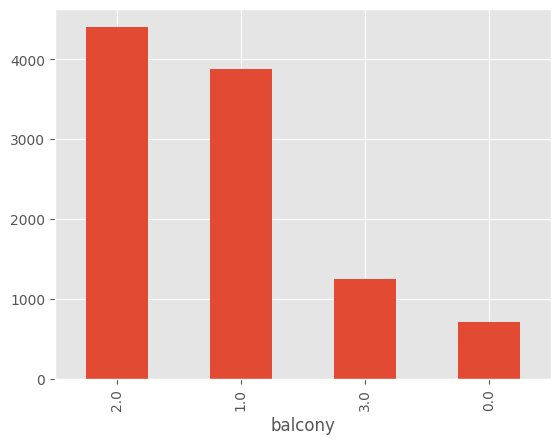

In [68]:
df['balcony'].value_counts().plot(kind='bar')

- Most properties offer 2 balconies, with 1 balcony being the next most common option

In [69]:
df.columns

Index(['area_type', 'availability', 'location', 'total_sqft', 'bath',
       'balcony', 'price', 'bhk', 'price_per_sqft'],
      dtype='object')

In [70]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

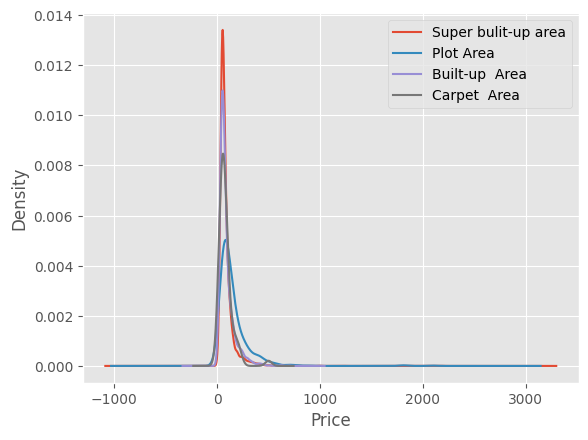

In [71]:
df[df['area_type']=='Super built-up  Area']['price'].plot(kind='kde',label='Super bulit-up area')
df[df['area_type']=='Plot  Area']['price'].plot(kind='kde',label='Plot Area')
df[df['area_type']=='Built-up  Area']['price'].plot(kind='kde',label='Built-up  Area')
df[df['area_type']=='Carpet  Area']['price'].plot(kind='kde',label='Carpet  Area')
plt.xlabel('Price')
plt.legend()

In [72]:
df.columns

Index(['area_type', 'availability', 'location', 'total_sqft', 'bath',
       'balcony', 'price', 'bhk', 'price_per_sqft'],
      dtype='object')

In [73]:
df['availability'].unique()

array(['Other', 'Ready To Move'], dtype=object)

<Axes: xlabel='price', ylabel='availability'>

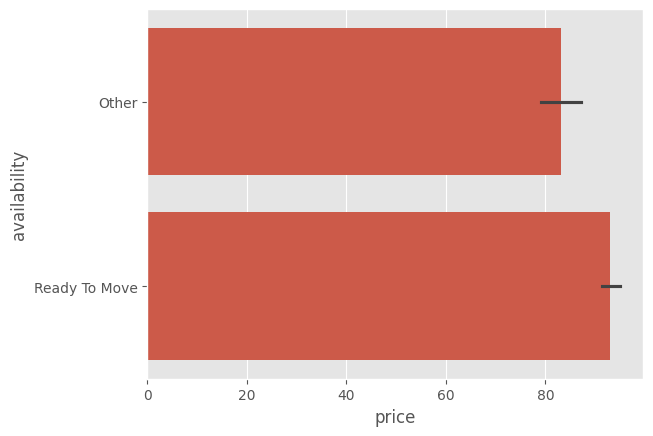

In [74]:
sns.barplot(x='price', y='availability', data=df)

In [75]:
df.columns

Index(['area_type', 'availability', 'location', 'total_sqft', 'bath',
       'balcony', 'price', 'bhk', 'price_per_sqft'],
      dtype='object')

In [76]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(7342, 9)

In [77]:
df= df[df.bath<df.bhk+2]
df.shape

(7264, 9)

In [78]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Super built-up Area,Ready To Move,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Plot Area,Ready To Move,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Super built-up Area,Ready To Move,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419
4,Super built-up Area,Ready To Move,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509
5,Super built-up Area,Ready To Move,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.654699


In [79]:
dummies1 = pd.get_dummies(df['area_type']).astype('int')
dummies1.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1


In [80]:
df = pd.concat([df, dummies1], axis='columns')
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,Super built-up Area,Ready To Move,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000,0,0,0,1
2,Plot Area,Ready To Move,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667,0,0,1,0
3,Super built-up Area,Ready To Move,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419,0,0,0,1
4,Super built-up Area,Ready To Move,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509,0,0,0,1
5,Super built-up Area,Ready To Move,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.654699,0,0,0,1


In [81]:
df = df.drop('area_type', axis='columns')
df.head()

,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,Ready To Move,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000,0,0,0,1
2,Ready To Move,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667,0,0,1,0
3,Ready To Move,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419,0,0,0,1
4,Ready To Move,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509,0,0,0,1
5,Ready To Move,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.654699,0,0,0,1


In [82]:
df['availability'].value_counts()

availability
Ready To Move    5776
Other            1488
Name: count, dtype: int64

In [83]:
dummies2 = pd.get_dummies(df['availability']).astype('int')
df = pd.concat([df, dummies2], axis='columns')
df = df.drop('availability', axis=1)
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Other,Ready To Move
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000,0,0,0,1,0,1
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667,0,0,1,0,0,1
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419,0,0,0,1,0,1
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509,0,0,0,1,0,1
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.654699,0,0,0,1,0,1


In [84]:
dummies3 = pd.get_dummies(df['location']).astype('int')
df = pd.concat([df, dummies3], axis='columns')
df = df.drop('location', axis=1)
df.head()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,3200.000000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,6916.666667,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,3418.803419,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,4561.403509,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,4540.654699,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df = df.drop('price_per_sqft', axis=1)
df.head()

,total_sqft,bath,balcony,price,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Other,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df.shape

(7264, 253)

<Axes: ylabel='Density'>

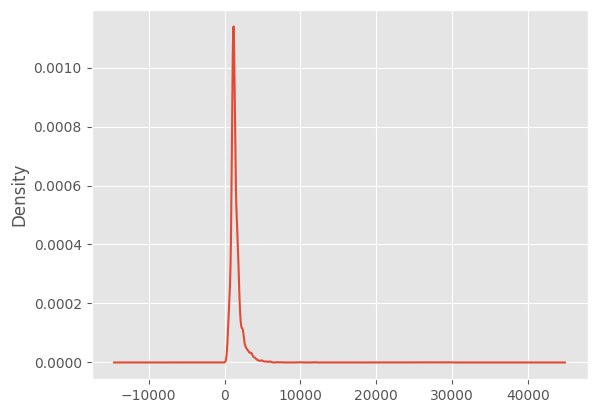

In [87]:
df['total_sqft'].plot(kind='kde')

In [88]:
X = df.drop('price', axis=1)
y = df['price']

In [89]:
X.head()

,total_sqft,bath,balcony,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Other,Ready To Move,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,2,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,2,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (5811, 252)
y_train: (5811,)
X_test: (1453, 252)
y_test: (1453,)


In [92]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [93]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [94]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set: ')
    print(f"- Root Mean Squared Error: {train_rmse:.2f}")
    print(f"- Mean Absolute Error: {train_mae:.2f}")
    print(f"- R2 Score: {train_r2:.2f}")

    print('----------------------------')

    print('Model performance for test set: ')
    print(f"- Root Mean Squared Error: {test_rmse:.2f}")
    print(f"- Mean Absolute Error: {test_mae:.2f}")
    print(f"- R2 Score: {test_r2:.2f}")
    r2_list.append(test_r2)

    print("="*35)
    print('\n')

Linear Regression
Model performance for training set: 
- Root Mean Squared Error: 34.42
- Mean Absolute Error: 16.95
- R2 Score: 0.86
----------------------------
Model performance for test set: 
- Root Mean Squared Error: 29.56
- Mean Absolute Error: 17.47
- R2 Score: 0.85


Lasso
Model performance for training set: 
- Root Mean Squared Error: 47.92
- Mean Absolute Error: 23.76
- R2 Score: 0.72
----------------------------
Model performance for test set: 
- Root Mean Squared Error: 38.05
- Mean Absolute Error: 22.06
- R2 Score: 0.75


Ridge
Model performance for training set: 
- Root Mean Squared Error: 34.58
- Mean Absolute Error: 16.91
- R2 Score: 0.85
----------------------------
Model performance for test set: 
- Root Mean Squared Error: 28.89
- Mean Absolute Error: 17.23
- R2 Score: 0.85


K-Neighbors Regressor
Model performance for training set: 
- Root Mean Squared Error: 42.56
- Mean Absolute Error: 18.69
- R2 Score: 0.78
----------------------------
Model performance for test

In [95]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_name', 'R2 Score']).sort_values

<bound method DataFrame.sort_values of                 Model_name  R2 Score
0        Linear Regression  0.846692
1                    Lasso  0.746028
2                    Ridge  0.853596
3    K-Neighbors Regressor  0.717735
4  Decision Tree Regressor  0.829205
5  Random Forest Regressor  0.890540
6             XGBRegressor  0.892516
7       AdaBoost Regressor  0.721578>

In [96]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
def predict_price(location,area,availability,sqft,bath,balcony,bhk):    
    loc_index = np.where(X.columns == location)[0]
    area_index = np.where(X.columns == area)[0]
    availability_index = np.where(X.columns == availability)[0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if len(loc_index) > 0:
        x[loc_index[0]] = 1
    if len(area_index) > 0:
        x[area_index[0]] = 1
    if len(availability_index) > 0:
        x[availability_index[0]] = 1

    return xgb.predict([x])[0]

In [97]:
print(predict_price('Indira Nagar', 'Super built-up  Area', 'Ready To Move', 1000, 2, 2, 2))
print(predict_price('Indira Nagar', 'Super built-up  Area', 'Ready To Move', 1400, 3, 2, 3))
print(predict_price('Electronic City Phase II', 'Super built-up  Area', 'Ready To Move', 1000, 2, 2, 2))
print(predict_price('Indira Nagar', 'Super built-up  Area', 'Ready To Move', 2400, 5, 4, 6))

97.92479
165.82727
39.78228
343.13602


In [98]:
xgb.score(X_train, y_train)

0.9589037941081517

In [99]:
import pickle

In [100]:
pickle.dump(xgb, open('xgb_model.pkl', 'wb'))

In [101]:
X_columns = df.drop(columns=['price']).columns
pickle.dump(X_columns, open('X_columns.pkl', 'wb'))